# **Midterm project : Experiment1**
> #### Programming for Applied Deep Learning (GKSG008-01)
> #### 20181202 김수미 / (Team with. Stephan Isabel)

## **1-1. Choose the 2nd column of the dataset, edit your pytorch code appropriately, run the code, get the results, and plot figures.**

**1. Import Libraries and Define Function**

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils import data
from torch import nn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

**2. Generate Dataset**

In [ ]:
features, targets = datasets.load_diabetes(return_X_y=True)
# Choose the 2nd column of the dataset
features = features[:, np.newaxis, 2]

**3. Split data : Training & Testing**

In [ ]:
# Train data
features_train = features[:-20]
targets_train = targets[:-20]

f_train = torch.from_numpy(features_train)
t_train = torch.from_numpy(targets_train)
f_train,t_train = f_train.type(torch.FloatTensor),t_train.type(torch.FloatTensor)
t_train = torch.reshape(t_train, (422, 1))

In [ ]:
# Test data
features_test = features[-20:]
targets_test = targets[-20:]

f_test = torch.from_numpy(features_test)
t_test = torch.from_numpy(targets_test)
f_test,t_test = f_test.type(torch.FloatTensor),t_test.type(torch.FloatTensor)
t_test = torch.reshape(t_test, (20, 1))

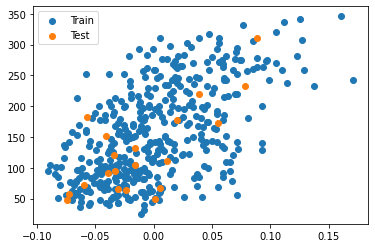

In [ ]:
graph = plt.scatter(features_train, targets_train, label='Train'),
plt.scatter(features_test, targets_test, label='Test'),
plt.legend()
plt.show(graph)

**4. Set Parameters and Neural Network**

In [ ]:
true_w = torch.tensor([2.0])
true_b = 4.2
batch_size = 10
data_iter = load_array((f_train, t_train), batch_size)

In [ ]:
net = nn.Sequential(nn.Linear(in_features=1, out_features=1))
loss = nn.MSELoss() 
trainer = torch.optim.SGD(net.parameters(), lr=0.09)

**3. Train the Model**

In [ ]:
loss_results = []
w_list = []
b_list = []

num_epochs = 100
for epoch in range(num_epochs):
    for X, y in data_iter:
        ypred = net(X)
        mseloss = loss(ypred, y)
        loss_results.append(mseloss.item())
        trainer.zero_grad()
        mseloss.backward()
        trainer.step()
        w = net[0].weight.data.item()
        b = net[0].bias.data.item()
        w_list.append(w)
        b_list.append(b)
        l = loss(net(f_train), t_train)
    if epoch % 10 == 9:
      print(f'epoch {epoch + 1}, loss {l:f}')

epoch 10, loss 5473.076660
epoch 20, loss 5626.166992
epoch 30, loss 4813.849121
epoch 40, loss 4523.443848
epoch 50, loss 4325.282715
epoch 60, loss 4408.834473
epoch 70, loss 4195.774414
epoch 80, loss 4422.270020
epoch 90, loss 4100.964355
epoch 100, loss 4030.365479


**4. Training Results**

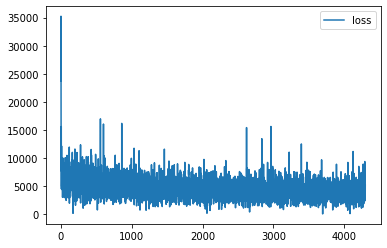

In [ ]:
graph = plt.plot(loss_results,label='loss'), plt.legend()
plt.show(graph)

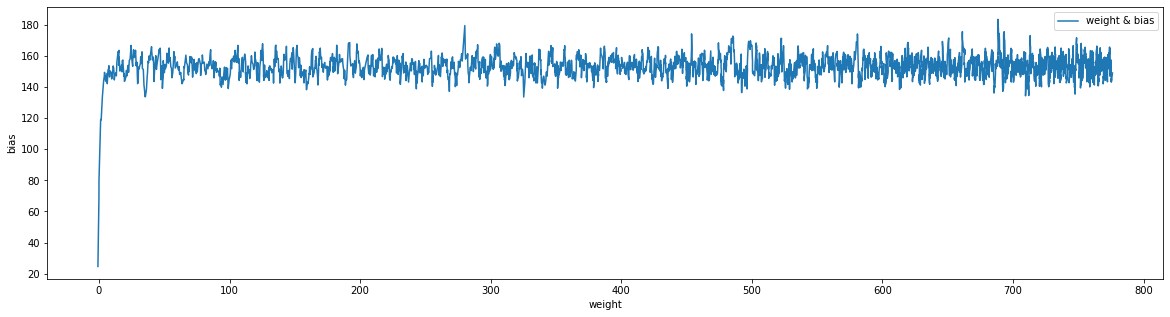

In [ ]:
plt.figure(figsize=(18,5))
graph = plt.plot(w_list, b_list, label='weight & bias'),
plt.xlabel('weight'), plt.ylabel('bias'), plt.legend()
plt.show(graph)

In [ ]:
ypred = net(f_test)
ypred = ypred.detach().numpy()
print("< Pytorch >")
# Mean squared error
print('Mean squared error: %.2f' % mean_squared_error(t_test, ypred))
# Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(t_test, ypred))

< Pytorch >
Mean squared error: 2654.35
Coefficient of determination: 0.45


**5. Plot the Results**

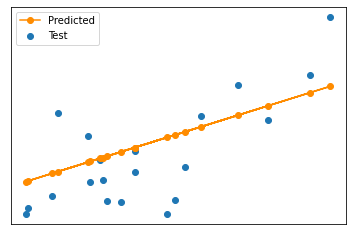

In [ ]:
# Test dataset
graph = plt.scatter(f_test, t_test, label='Test'),
plt.plot(f_test, ypred, color='darkorange', label='Predicted', marker='o'),
plt.xticks(()), plt.yticks(()), plt.legend()
plt.show(graph)

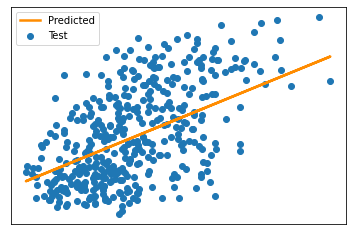

In [ ]:
# Train dataset
train_pred = net(f_train)
train_pred = train_pred.detach().numpy()
graph = plt.scatter(f_train, t_train, label='Test'),
plt.plot(f_train, train_pred, color='darkorange', linewidth=2.5, label='Predicted'),
plt.xticks(()), plt.yticks(()), plt.legend()
plt.show(graph)

## **1-2. Compare the result from your pytorch code to the result from sklearn.**

**1. Scikit-learn Training and Result**

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(f_train, t_train)
# Make predictions using the testing set
sk_pred = regr.predict(f_test)

In [ ]:
print("< sklearn >")
# The coefficients
print('Coefficients: ', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(t_test, sk_pred))
# The coefficient of determination: 1 is perfect prediction
# Sklearn model : bit more accurate than Pytorch
print('Coefficient of determination: %.2f' % r2_score(t_test, sk_pred))

< sklearn >
Coefficients:  [[938.238]]
Mean squared error: 2548.07
Coefficient of determination: 0.47


**2. Plot Together (Pytorch and sklearn)**

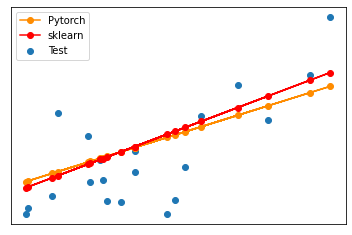

In [ ]:
# Test dataset
graph = plt.scatter(f_test, t_test, label='Test'),
plt.plot(f_test, ypred, color='darkorange', label='Pytorch', marker='o'),
plt.plot(f_test, sk_pred, color='red', label='sklearn', marker='o'),
plt.xticks(()), plt.yticks(()), plt.legend()
plt.show(graph)

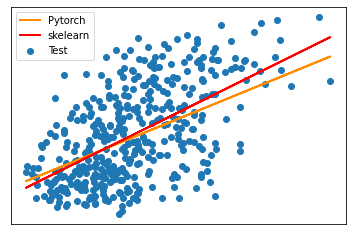

In [ ]:
# Train dataset
torch_train_pred = net(f_train)
torch_train_pred = torch_train_pred.detach().numpy()
sk_train_pred = regr.predict(f_train)
graph = plt.scatter(f_train, t_train, label='Test'),
plt.plot(f_train, torch_train_pred, color = 'darkorange', linewidth=2, label='Pytorch'),
plt.plot(f_train, sk_train_pred, color = 'red', linewidth=2, label='skelearn'),
plt.xticks(()), plt.yticks(()), plt.legend()
plt.show(graph)